## Imports
All the libraries, models, and metrics I will be using!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data Input
Opened Excel File on nymtc.org --> copy and pasted into ChatGPT to get csv --> read csv in notebook and drop null values

I intially started with 2021 to 2023 data to see what it would look like before moving to pre-pandemic data which was easier to make stationary.

In [3]:
#Q4 2023 Bus and Rail Data
Q4_2023_inital = pd.read_csv('data/2023/Q4_2023_Weekday_Average_Bus_and_Rail_Ridership.csv')
Q4_2023 = Q4_2023_inital.dropna().reset_index().drop('index', axis = 1)

In [4]:
#Q3 2023 Bus and Rail Data
Q3_2023_inital = pd.read_csv('data/2023/Q3_2023_Weekday_Average_Bus_and_Rail_Ridership.csv')
Q3_2023 = Q3_2023_inital.dropna().reset_index().drop('index', axis = 1)


In [5]:
#Q2 2023 Bus and Rail Datad
Q2_2023_inital = pd.read_csv('data/2023/Q2_2023_Weekday_Average_Bus_and_Rail_Ridership.csv')
Q2_2023 = Q2_2023_inital.dropna().reset_index().drop('index', axis = 1)


In [6]:
#Q1 2023 Bus and Rail Data
Q1_2023 = pd.read_csv('data/2023/mta_q1_2023_ridership_with_rows.csv').dropna().reset_index().drop('index', axis = 1)

In [7]:
#Q4 of 2022
Q4_2022 = pd.read_csv('data/2022/q4_2022_average_weekday_bus_and_rail_trips.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1).drop([29,30])


In [8]:
#Q3 of 2022
Q3_2022 = pd.read_csv('data/2022/q3_2022_average_weekday_bus_and_rail_trips.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1).drop([29,30])

In [9]:
#Q2 of 2022
Q2_2022 = pd.read_csv('data/2022/q2_2022_average_weekday_bus_and_rail_ridership.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1).drop([29, 30])


In [10]:
#Q1 of 2022
Q1_2022 = pd.read_csv('data/2022/Q1_2022_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)

In [11]:
#Q4 of 2021
Q4_2021 = pd.read_csv('data/2021/Q4_2021_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)

In [12]:
#Q3 of 2021
Q3_2021 = pd.read_csv('data/2021/Q3_2021_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)

In [13]:
#Q2 of 2021
Q2_2021 = pd.read_csv('data/2021/Q2_2021_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)


In [14]:
#Q1 of 2021
Q1_2021 = pd.read_csv('data/2021/Q1_2021_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)


In [15]:
#2016 DATA
Q1_2016 = pd.read_csv('data/2016/Q1_2016_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)
Q2_2016 = pd.read_csv('data/2016/Q2_2016_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)
Q3_2016 = pd.read_csv('data/2016/Q3_2016_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)
Q4_2016 = pd.read_csv('data/2016/Q4_2016_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)

In [16]:
#2017 DATA
Q1_2017 = pd.read_csv('data/2017/Q1_2017_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)
Q2_2017 = pd.read_csv('data/2017/Q2_2017_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)
Q3_2017 = pd.read_csv('data/2017/Q3_2017_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)
Q4_2017 = pd.read_csv('data/2017/Q4_2017_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)

In [17]:
#2018 DATA
Q1_2018 = pd.read_csv('data/2018/Q1_2018_Transit_Data.csv').dropna().drop('Category', axis = 1).reset_index().drop('index', axis = 1)
Q2_2018 = pd.read_csv('data/2018/Q2_2018_Transit_Data.csv').dropna().reset_index().drop('index', axis = 1) 
Q3_2018 = pd.read_csv('data/2018/Q3_2018_Transit_Data.csv').dropna().reset_index().drop('index', axis = 1)
Q4_2018 = pd.read_csv('data/2018/Q4_2018_Transit_Data.csv').dropna().reset_index().drop('index', axis = 1)

## RAIL DATA 2021 - 2023
The csv files contained information about multiple transit agencies in the NYMTC region, but I only wanted to focus on MTA ridership for now.

In [18]:
#RAIL FUNCTION
#Will get only the MTA ridership data from each quarter
def ex_rail(df):
    return df.iloc[0:5, 0:4]

In [19]:
#RAIL DATASET 21 - 23
Q1_2021_rail = ex_rail(Q1_2021)
Q2_2021_rail = ex_rail(Q2_2021)
Q3_2021_rail = ex_rail(Q3_2021)
Q4_2021_rail = ex_rail(Q4_2021)

Q1_2022_rail = ex_rail(Q1_2022)
Q2_2022_rail = ex_rail(Q2_2022)
Q3_2022_rail = ex_rail(Q3_2022)
Q4_2022_rail = ex_rail(Q4_2022)

Q1_2023_rail = ex_rail(Q1_2023)
Q2_2023_rail = ex_rail(Q2_2023)
Q3_2023_rail = ex_rail(Q3_2023)
Q4_2023_rail = ex_rail(Q4_2023)

In [20]:
rail_frames_21_23 = [Q1_2021_rail, Q2_2021_rail, Q3_2021_rail, Q4_2021_rail,
          Q1_2022_rail, Q2_2022_rail, Q3_2022_rail, Q4_2022_rail,
          Q1_2023_rail, Q2_2023_rail, Q3_2023_rail, Q4_2023_rail]

In [21]:
rail_int_21_23 = pd.concat(rail_frames_21_23, axis = 1, join = 'inner')
rail_21_23 = rail_int_21_23.drop(rail_int_21_23.columns[4::4], axis=1)
rail_21_23.insert(0, 'Agency', ['MTA/NYC Transit Subway', 'MTA/Staten Island Railway', 'MTA/Metro-North Railroad', 'MTA/Long Island Rail Road', 'Total'])
rail_21_23

,Agency,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,...,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023
0,MTA/NYC Transit Subway,1595200.0,1598244.0,1850071.0,1984839.0,2180084.0,2389882.0,2435057.0,2422270.0,2751895.0,...,3685405.0,3659612.0,3850249.0,3616759.0,3435924.0,3353382.0,3721256.0,3859962.0,3772808.0,3670101.0
1,MTA/Staten Island Railway,3590.0,3450.0,3958.0,4715.0,4545.0,4969.0,5028.0,5049.0,6173.0,...,8388.0,7772.0,8568.0,7672.0,6532.0,6468.0,8271.0,8870.0,8529.0,7836.0
2,MTA/Metro-North Railroad,53485.0,53527.0,62429.0,69792.0,83609.0,99767.0,105192.0,100566.0,115606.0,...,179908.0,186985.0,200066.0,197055.0,187219.0,183532.0,190375.0,206799.0,209186.0,199225.0
3,MTA/Long Island Rail Road,73051.0,67318.0,74271.0,80959.0,99149.0,111901.0,123086.0,117645.0,136128.0,...,201614.0,215797.0,223566.0,227437.0,233631.0,218133.0,235055.0,235077.0,247035.0,242249.0
4,Total,1725326.0,1722539.0,1990729.0,2140305.0,2367387.0,2606519.0,2668363.0,2645530.0,3009802.0,...,4075315.0,4070166.0,4282449.0,4048923.0,3863306.0,3761515.0,4154957.0,4310708.0,4237558.0,4119411.0


In [22]:
rail_numbers_21_23 = rail_21_23.drop('Agency', axis = 1)
rail_numbers_21_23

,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,...,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023
0,1595200.0,1598244.0,1850071.0,1984839.0,2180084.0,2389882.0,2435057.0,2422270.0,2751895.0,3099704.0,...,3685405.0,3659612.0,3850249.0,3616759.0,3435924.0,3353382.0,3721256.0,3859962.0,3772808.0,3670101.0
1,3590.0,3450.0,3958.0,4715.0,4545.0,4969.0,5028.0,5049.0,6173.0,7144.0,...,8388.0,7772.0,8568.0,7672.0,6532.0,6468.0,8271.0,8870.0,8529.0,7836.0
2,53485.0,53527.0,62429.0,69792.0,83609.0,99767.0,105192.0,100566.0,115606.0,130898.0,...,179908.0,186985.0,200066.0,197055.0,187219.0,183532.0,190375.0,206799.0,209186.0,199225.0
3,73051.0,67318.0,74271.0,80959.0,99149.0,111901.0,123086.0,117645.0,136128.0,148316.0,...,201614.0,215797.0,223566.0,227437.0,233631.0,218133.0,235055.0,235077.0,247035.0,242249.0
4,1725326.0,1722539.0,1990729.0,2140305.0,2367387.0,2606519.0,2668363.0,2645530.0,3009802.0,3386062.0,...,4075315.0,4070166.0,4282449.0,4048923.0,3863306.0,3761515.0,4154957.0,4310708.0,4237558.0,4119411.0


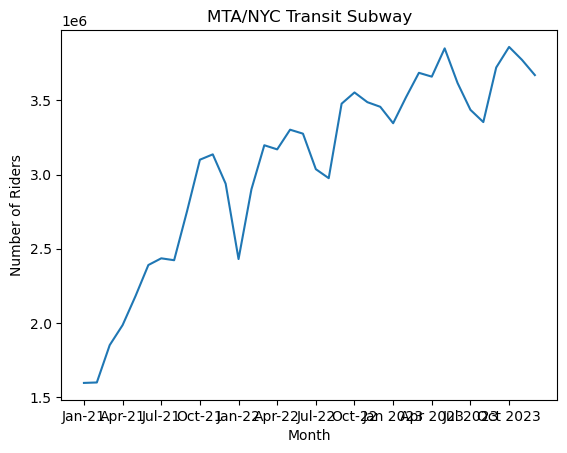

In [23]:
mta_row = rail_numbers_21_23.iloc[0]
mta_row_df = mta_row.reset_index()
mta_row_df.columns = ["Month", "Number of Riders"]

sns.lineplot(data=mta_row_df, x="Month", y="Number of Riders")
plt.title("MTA/NYC Transit Subway")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::3])
plt.show()

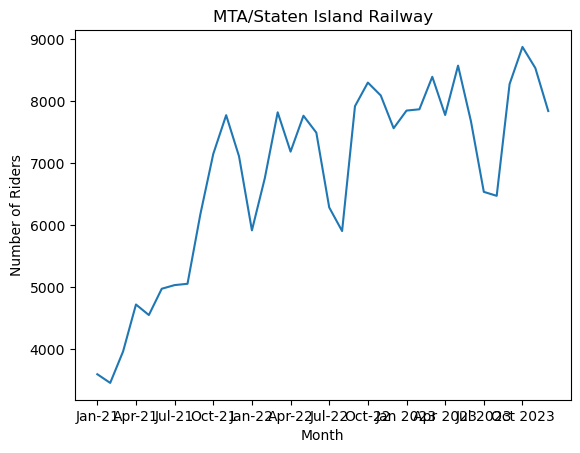

In [24]:
SIR_row = rail_numbers_21_23.iloc[1]
SIR_row_df = SIR_row.reset_index()
SIR_row_df.columns = ["Month", "Number of Riders"]

sns.lineplot(data=SIR_row_df, x="Month", y="Number of Riders")
plt.title("MTA/Staten Island Railway")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::3])
plt.show()

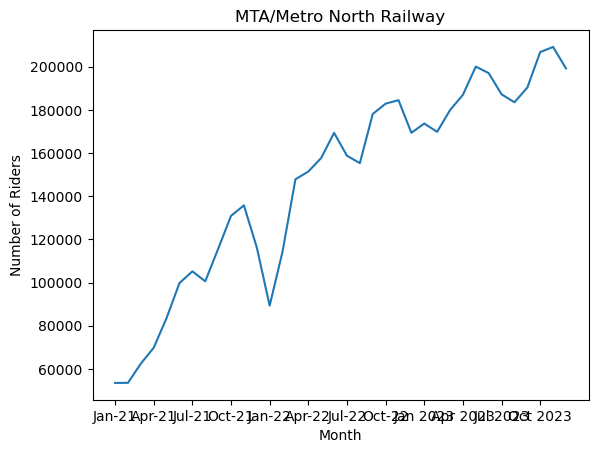

In [25]:
MN_row = rail_numbers_21_23.iloc[2]
MN_row_df = MN_row.reset_index()
MN_row_df.columns = ["Month", "Number of Riders"]

sns.lineplot(data=MN_row_df, x="Month", y="Number of Riders")
plt.title("MTA/Metro North Railway")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::3])
plt.show()

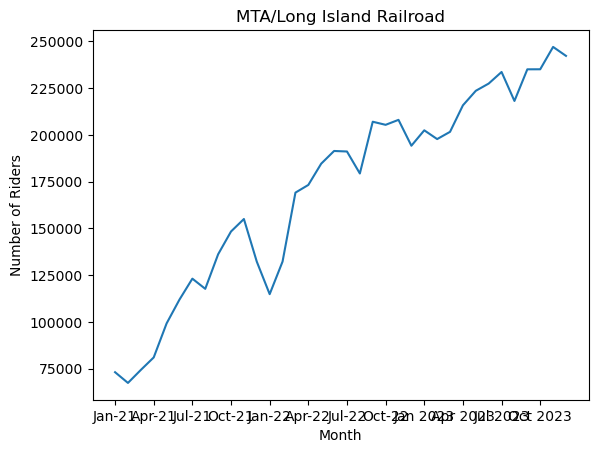

In [26]:
LIRR_row = rail_numbers_21_23.iloc[3]
LIRR_row_df = LIRR_row.reset_index()
LIRR_row_df.columns = ["Month", "Number of Riders"]

sns.lineplot(data=LIRR_row_df, x="Month", y="Number of Riders")
plt.title("MTA/Long Island Railroad")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::3])
plt.show()

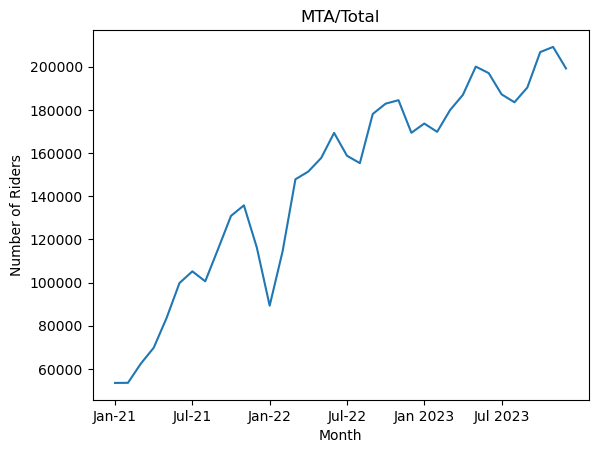

In [27]:
Total_row = rail_numbers_21_23.iloc[2]
Total_row_df = Total_row.reset_index()
Total_row_df.columns = ["Month", "Number of Riders"]

sns.lineplot(data=Total_row_df, x="Month", y="Number of Riders")
plt.title("MTA/Total")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::6])
plt.show()

## RAIL DATA 16 - 18

In [28]:
#RAIL DATASET 21 - 23
Q1_2016_rail = ex_rail(Q1_2016)
Q2_2016_rail = ex_rail(Q2_2016)
Q3_2016_rail = ex_rail(Q3_2016)
Q4_2016_rail = ex_rail(Q4_2016)

Q1_2017_rail = ex_rail(Q1_2017)
Q2_2017_rail = ex_rail(Q2_2017)
Q3_2017_rail = ex_rail(Q3_2017)
Q4_2017_rail = ex_rail(Q4_2017)

Q1_2018_rail = ex_rail(Q1_2018)
Q2_2018_rail = ex_rail(Q2_2018)
Q3_2018_rail = ex_rail(Q3_2018)
Q4_2018_rail = ex_rail(Q4_2018)

In [29]:
rail_frames_16_18 = [Q1_2016_rail, Q2_2016_rail, Q3_2016_rail, Q4_2016_rail,
          Q1_2017_rail, Q2_2017_rail, Q3_2017_rail, Q4_2017_rail,
          Q1_2018_rail, Q2_2018_rail, Q3_2018_rail, Q4_2018_rail]

In [30]:
rail_int_16_18 = pd.concat(rail_frames_16_18, axis = 1, join = 'inner')
rail_16_18 = rail_int_16_18.drop(rail_int_16_18.columns[4::4], axis = 1)
rail_16_18.insert(0, 'Agency', ['MTA/NYC Transit Subway', 'MTA/Staten Island Railway', 'MTA/Metro-North Railroad', 'MTA/Long Island Rail Road', 'Total'])
rail_16_18

,Agency,Jan-16,Feb-16,Mar-16,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,...,Mar-18,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,Nov-18,Dec-18
0,MTA/NYC Transit Subway,5450458.0,5597172.0,5771631.0,5728003.0,5868961.0,5763243.0,5445341.0,5276450.0,5816860.0,...,5388832.0,5564686.0,5743481.0,5569036.0,5232455.0,5068468.0,5524451.0,5734634.0,5556889.0,5280965.0
1,MTA/Staten Island Railway,16441.0,15738.0,16674.0,16039.0,16949.0,16613.0,13990.0,13672.0,17389.0,...,15963.0,16226.0,17399.0,16213.0,13786.0,13382.0,17089.0,17847.0,17020.0,15600.0
2,MTA/Metro-North Railroad,269313.0,268755.0,280715.0,281999.0,282149.0,295822.0,288191.0,275500.0,288212.0,...,280851.0,289923.0,295061.0,306545.0,295276.0,282483.0,296476.0,301176.0,300641.0,393304.0
3,MTA/Long Island Rail Road,298683.0,292604.0,301360.0,305742.0,311313.0,319475.0,326075.0,303263.0,318591.0,...,298352.0,303688.0,310397.0,328561.0,319177.0,301170.0,327002.0,316919.0,326138.0,323891.0
4,Total,6034895.0,6174269.0,6370380.0,6331783.0,6479372.0,6395153.0,6073597.0,5868885.0,6441052.0,...,5983998.0,6174523.0,6366338.0,6220355.0,5860694.0,5665503.0,6165018.0,6370576.0,6200688.0,6013760.0


In [31]:
rail_numbers_16_18 = rail_16_18.drop('Agency', axis = 1)
rail_numbers_16_18

,Jan-16,Feb-16,Mar-16,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,Oct-16,...,Mar-18,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,Nov-18,Dec-18
0,5450458.0,5597172.0,5771631.0,5728003.0,5868961.0,5763243.0,5445341.0,5276450.0,5816860.0,5759591.0,...,5388832.0,5564686.0,5743481.0,5569036.0,5232455.0,5068468.0,5524451.0,5734634.0,5556889.0,5280965.0
1,16441.0,15738.0,16674.0,16039.0,16949.0,16613.0,13990.0,13672.0,17389.0,17330.0,...,15963.0,16226.0,17399.0,16213.0,13786.0,13382.0,17089.0,17847.0,17020.0,15600.0
2,269313.0,268755.0,280715.0,281999.0,282149.0,295822.0,288191.0,275500.0,288212.0,298985.0,...,280851.0,289923.0,295061.0,306545.0,295276.0,282483.0,296476.0,301176.0,300641.0,393304.0
3,298683.0,292604.0,301360.0,305742.0,311313.0,319475.0,326075.0,303263.0,318591.0,315279.0,...,298352.0,303688.0,310397.0,328561.0,319177.0,301170.0,327002.0,316919.0,326138.0,323891.0
4,6034895.0,6174269.0,6370380.0,6331783.0,6479372.0,6395153.0,6073597.0,5868885.0,6441052.0,6391185.0,...,5983998.0,6174523.0,6366338.0,6220355.0,5860694.0,5665503.0,6165018.0,6370576.0,6200688.0,6013760.0


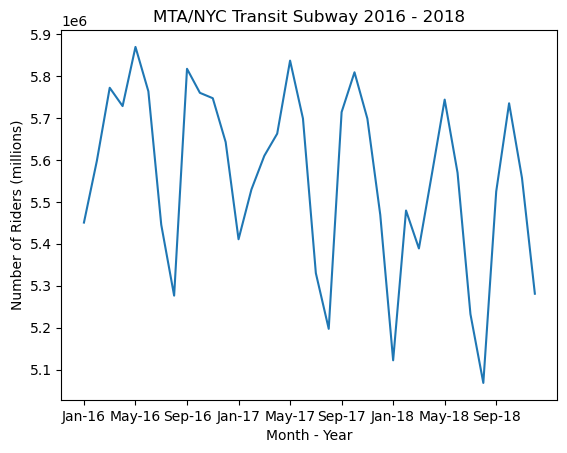

In [32]:
mta_row = rail_numbers_16_18.iloc[0]
mta_row_df = mta_row.reset_index()
mta_row_df.columns = ["Month - Year", "Number of Riders (millions)"]

sns.lineplot(data=mta_row_df, x="Month - Year", y="Number of Riders (millions)")
plt.title("MTA/NYC Transit Subway 2016 - 2018")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::4])
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

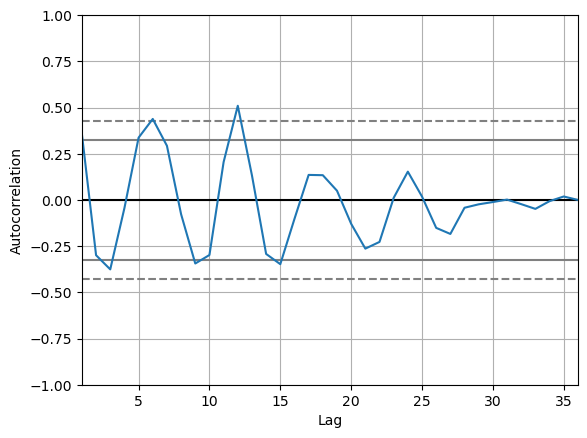

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(mta_row_df['Number of Riders (millions)'])

## ACF and PACF
ACF is overall correlation at various lags, while PACF isolates direct correlation at specific lags, removing the influence of intervening lags

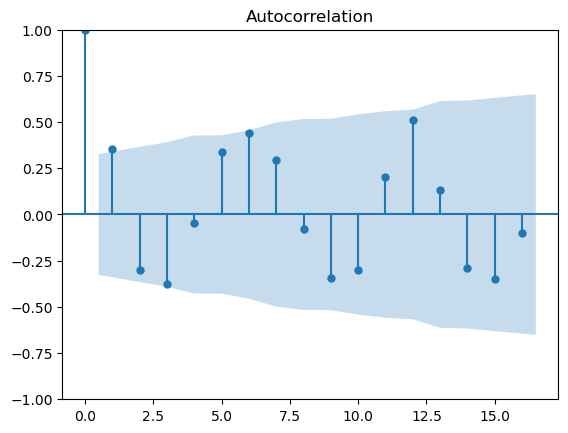

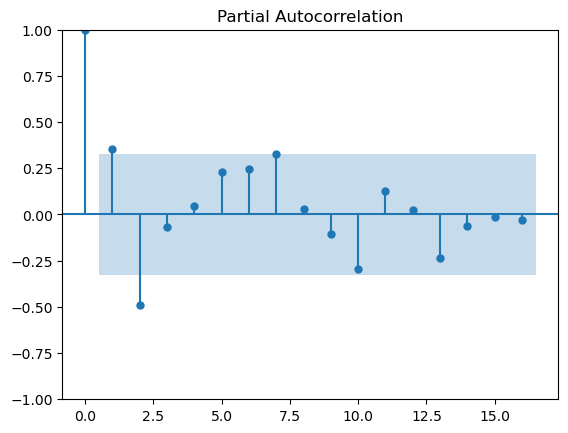

In [34]:
# ACF and PACF
# ACF is overall correlation at various lags
#PACF isolates direct correlation at specific lags, removing the influence of intervening lags

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(mta_row_df['Number of Riders (millions)'])
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(mta_row_df['Number of Riders (millions)'])
plt.show()

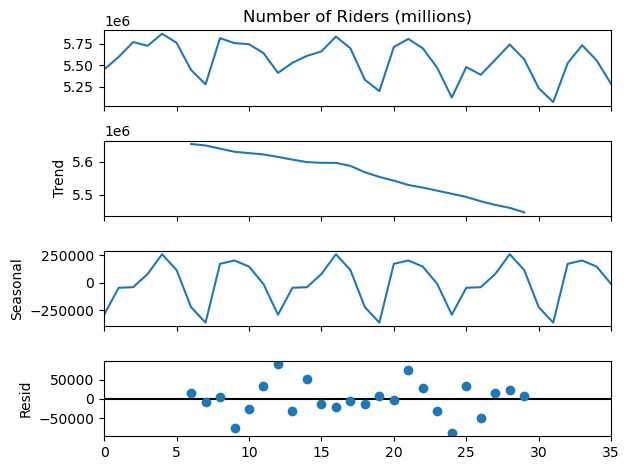

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mta_row_df['Number of Riders (millions)'], model = 'additive', period = 12)
decomposition.plot()
plt.show()

In [36]:
sarmia = SARIMAX(mta_row_df['Number of Riders (millions)'], order = (1,1,1), seasonal_order=(1,0,1,12))

In [37]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(mta_row_df['Number of Riders (millions)'])

ADF Statistic: 0.2581663929572755
p-value: 0.9753416436304652
Non-Stationary


In [38]:
mta_row_df['Log Riders'] = np.log(mta_row_df['Number of Riders (millions)'])

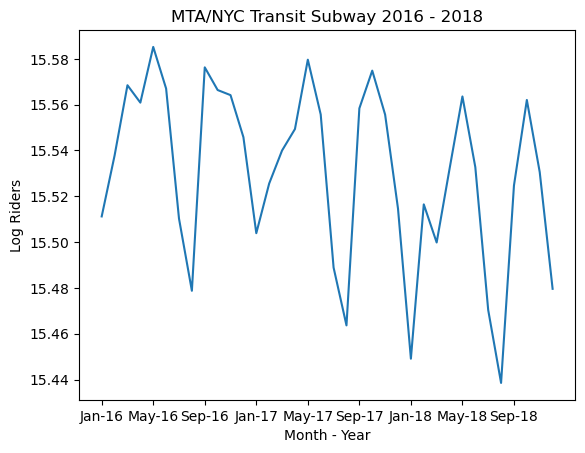

In [39]:
sns.lineplot(data=mta_row_df, x="Month - Year", y="Log Riders")
plt.title("MTA/NYC Transit Subway 2016 - 2018")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::4])
plt.show()

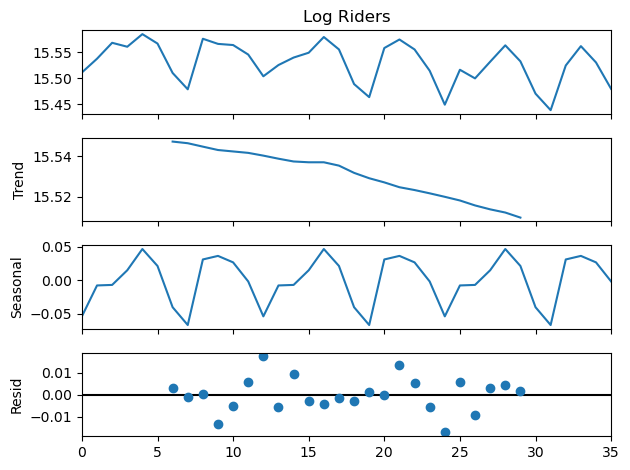

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mta_row_df['Log Riders'], model = 'additive', period = 12)
decomposition.plot()
plt.show()

In [41]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(mta_row_df['Log Riders'])

ADF Statistic: 0.3312013190416438
p-value: 0.9787315610332669
Non-Stationary


In [42]:
mta_row_df['SQRT Riders'] = np.sqrt(mta_row_df['Number of Riders (millions)'])

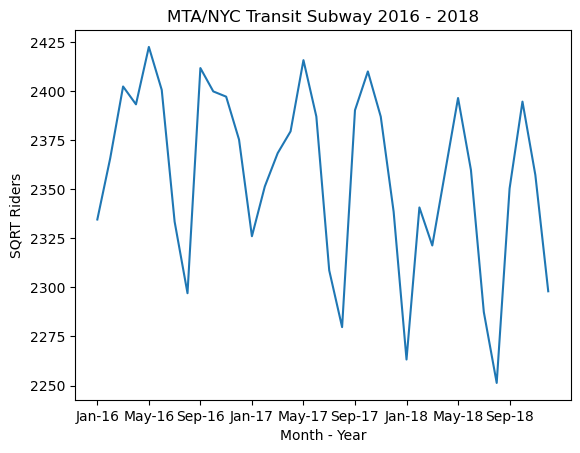

In [43]:
sns.lineplot(data=mta_row_df, x="Month - Year", y="SQRT Riders")
plt.title("MTA/NYC Transit Subway 2016 - 2018")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::4])
plt.show()

In [44]:
series = mta_row_df
X = series['Number of Riders (millions)']
X = X * X
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=31893984300616.054688, mean2=29982975126400.609375
variance1=3423077876541180681912320.000000, variance2=6104305084375806580359168.000000


In [45]:
series = mta_row_df
Y = series['Number of Riders (millions)']
Y = np.square(Y)
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.459235
p-value: 0.553572
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


In [46]:
mta_row_df['Riders Squared'] = np.square(mta_row_df['Number of Riders (millions)'])

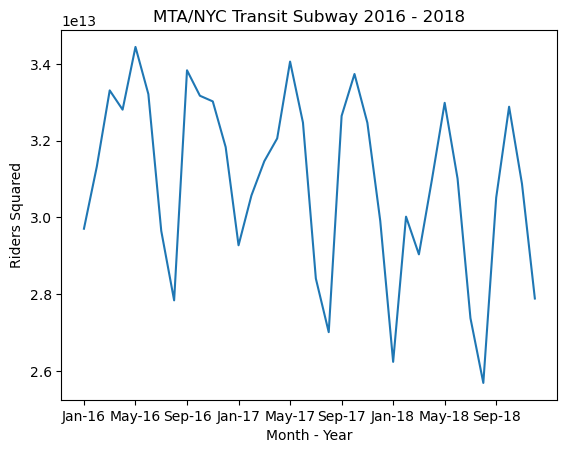

In [47]:
sns.lineplot(data=mta_row_df, x="Month - Year", y="Riders Squared")
plt.title("MTA/NYC Transit Subway 2016 - 2018")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::4])
plt.show()

In [48]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(mta_row_df['Riders Squared'])

ADF Statistic: -1.459235399120221
p-value: 0.5535720779724533
Non-Stationary


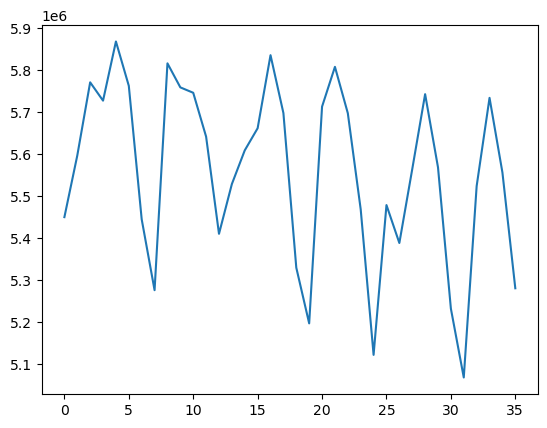

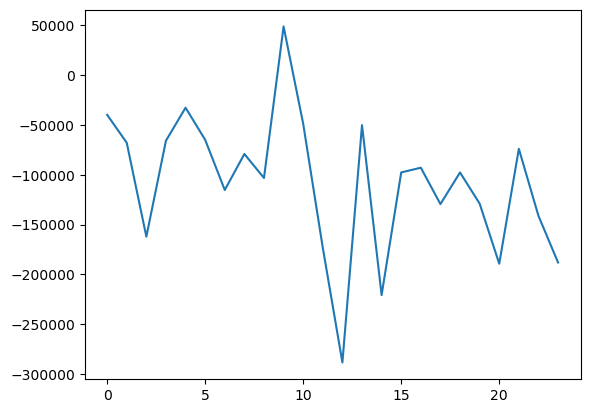

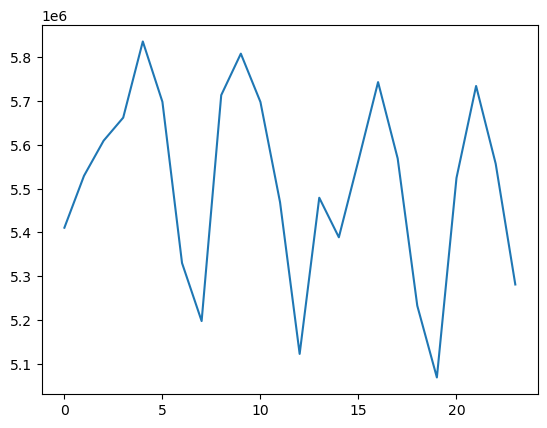

In [49]:
from math import sin
from math import radians
from matplotlib import pyplot

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob
 
# define a dataset with seasonality
data = mta_row_df['Number of Riders (millions)']
pyplot.plot(data)
pyplot.show()
# difference the dataset
diff = difference(data, 12)
pyplot.plot(diff)
pyplot.show()
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
pyplot.plot(inverted)
pyplot.show()

In [50]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(diff)

ADF Statistic: -4.375857476798262
p-value: 0.00032743710697839644
Stationary


In [51]:
Y = diff
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.375857
p-value: 0.000327
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


In [52]:
mta_row_df_24 = mta_row_df.loc[:23, :]
mta_row_df_24['Diff'] = diff

/tmp/ipykernel_74/505397804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_row_df_24['Diff'] = diff


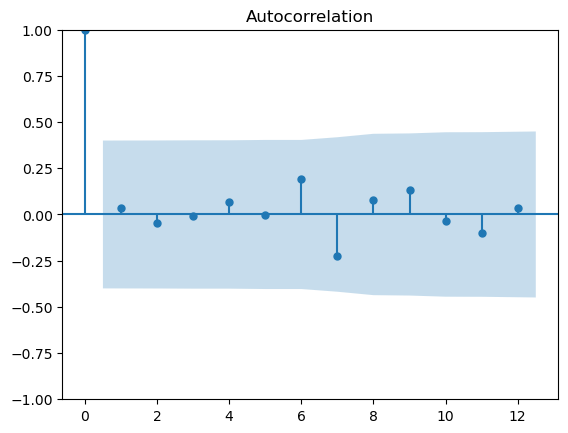

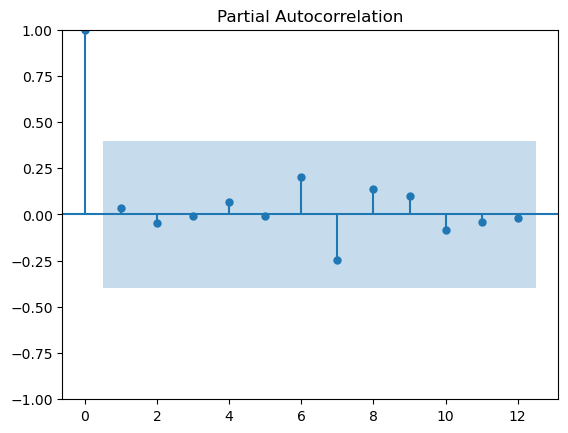

In [53]:
# Plot ACF and PACF
plot_acf(mta_row_df_24['Diff'])
plot_pacf(mta_row_df_24['Diff'])
plt.show()

In [54]:
# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(mta_row_df_24['Diff'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/srv/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/srv/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/srv/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21604D+00    |proj g|=  7.43417D-01


 This problem is unconstrained.



At iterate    5    f=  5.54752D+00    |proj g|=  3.23502D-02

At iterate   10    f=  5.54005D+00    |proj g|=  4.49379D-03

At iterate   15    f=  5.53987D+00    |proj g|=  5.55216D-04

At iterate   20    f=  5.53986D+00    |proj g|=  1.92186D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   1.232D-05   5.540D+00
  F =   5.5398637654036582     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


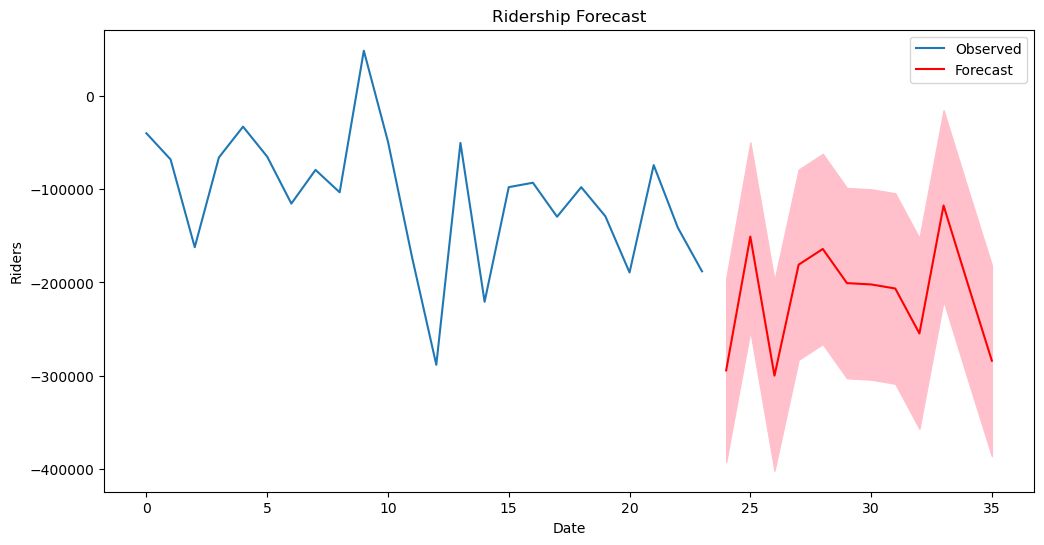

In [55]:
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(mta_row_df_24['Diff'], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Ridership Forecast")
plt.xlabel("Date")
plt.ylabel("Riders")
plt.legend()
plt.show()

In [56]:
observed = mta_row_df_24['Diff'][-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAE/Mean of Monthly ridership: {mae/np.mean(mta_row)}')

MAE: 71557.83478858428
MSE: 5788781604.260865
MAE/Mean of Monthly ridership: 0.012874260999921169


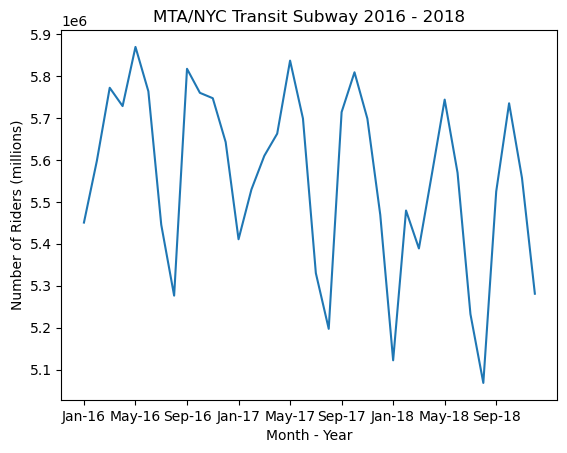

In [57]:
sns.lineplot(data=mta_row_df, x="Month - Year", y="Number of Riders (millions)")
plt.title("MTA/NYC Transit Subway 2016 - 2018")
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::4])
plt.show()